   ### 패션 MNIST
   - MNIST인데 옷, 신발, 가방 등의 라벨로 이루어진 이미지파일
  

In [15]:
# 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import numpy as np

In [32]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print('\n train shape = ', x_train.shape, ", train label shape = ", y_train.shape)
print('\n test shape = ', x_test.shape, ", test label shape = ", y_test.shape)

print('\n train label = ', y_train)
print('\n test label = ', y_test)


 train shape =  (60000, 28, 28) , train label shape =  (60000,)

 test shape =  (10000, 28, 28) , test label shape =  (10000,)

 train label =  [9 0 0 ... 3 0 5]

 test label =  [9 2 1 ... 8 1 5]


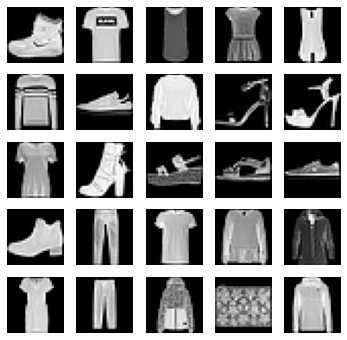

In [33]:
# 25개 이미지 출력

import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))

for index in range(25):
    plt.subplot(5, 5, index + 1)
    plt.imshow(x_train[index], cmap = 'gray')
    plt.axis("off")
    
plt.show()

In [34]:
# 데이터 전처리

# 데이터 정규화

x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# y라벨에 원핫 인코딩은 수행하지 않음
# 나중에 층을 쌓는 과정에서 처리함

In [35]:
# 모델 구축
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))

model.add(tf.keras.layers.Dense(100, activation = "relu"))

model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
             loss = 'sparse_categorical_crossentropy', # 원핫 인코딩을 안했기 때문에 cate
             metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 모델 학습
hist = model.fit(x_train, y_train, epochs = 30, validation_split = 0.3)


Epoch 1/30
1313/1313 [==============================] - 1s 791us/step - loss: 0.5359 - accuracy: 0.8141 - val_loss: 0.4264 - val_accuracy: 0.8508
Epoch 2/30
1313/1313 [==============================] - 1s 707us/step - loss: 0.4015 - accuracy: 0.8564 - val_loss: 0.3757 - val_accuracy: 0.8682
Epoch 3/30
1313/1313 [==============================] - 1s 718us/step - loss: 0.3561 - accuracy: 0.8725 - val_loss: 0.3705 - val_accuracy: 0.8686
Epoch 4/30
1313/1313 [==============================] - 1s 703us/step - loss: 0.3318 - accuracy: 0.8790 - val_loss: 0.3532 - val_accuracy: 0.8743
Epoch 5/30
1313/1313 [==============================] - 1s 701us/step - loss: 0.3093 - accuracy: 0.8859 - val_loss: 0.3371 - val_accuracy: 0.8778
Epoch 6/30
1313/1313 [==============================] - 1s 712us/step - loss: 0.2949 - accuracy: 0.8914 - val_loss: 0.3390 - val_accuracy: 0.8762
Epoch 7/30
1313/1313 [==============================] - 1s 720us/step - loss: 0.2790 - accuracy: 0.8966 - val_loss: 0.3384 -

In [37]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 423us/step - loss: 0.4282 - accuracy: 0.8768


[0.42821142077445984, 0.876800000667572]

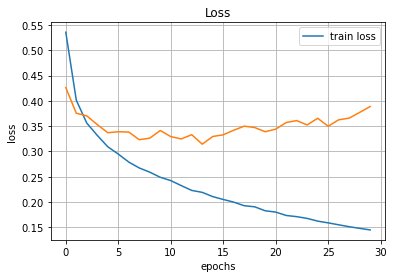

In [39]:
# 학습에 따른 손실

plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(hist.history["loss"], label = 'train loss')
plt.plot(hist.history["val_loss"], label = "validation loss")
plt.legend(loc = "best")

plt.show()

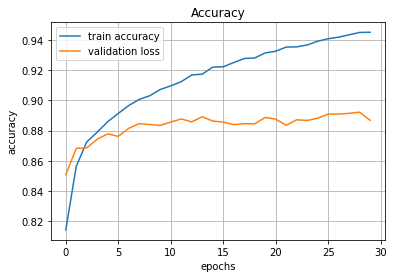

In [41]:
# 학습에 따른 정확도

plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()

plt.plot(hist.history["accuracy"], label = 'train accuracy')
plt.plot(hist.history["val_accuracy"], label = 'validation loss')
plt.legend(loc = "best")

plt.show()

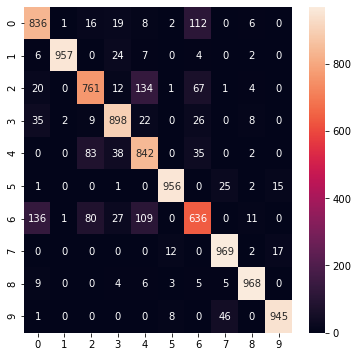

In [42]:
# 혼동행렬

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(y_test,
                     np.argmax(predicted_value, axis = 1))

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()